# Correlation Plots

In this notebook, we develop a function for plotting the most highly correlated variables with the label in a dataframe. 

In [1]:
from sklearn.datasets import load_boston

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = load_boston()
df = pd.DataFrame(data.data, columns = data.feature_names)
y = data.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
import featuretools as ft

In [4]:
es = ft.EntitySet('boston')
es.entity_from_dataframe('data', df, make_index = True, index = 'data_index')

Entityset: boston
  Entities:
    data [Rows: 506, Columns: 14]
  Relationships:
    No relationships

In [5]:
feature_matrix, feature_names = ft.dfs(entityset=es, target_entity='data', trans_primitives=['divide'])

In [6]:
feature_matrix = feature_matrix.replace({np.inf: np.nan})
feature_matrix.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,B / CHAS,TAX / RAD,NOX / DIS,CRIM / NOX,LSTAT / INDUS,RM / DIS,INDUS / NOX,LSTAT / NOX,INDUS / B,TAX / LSTAT
data_index,,,,,,,,,,,,,,,,,,,,,
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,NaN,296.0,0.131540,0.011747,2.155844,1.607579,4.293680,9.256506,0.005820,59.437751
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,NaN,121.0,0.094421,0.058230,1.292786,1.292706,15.074627,19.488273,0.017813,26.477024
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,NaN,121.0,0.094421,0.058188,0.570014,1.446518,15.074627,8.592751,0.017998,60.049628
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,NaN,74.0,0.075550,0.070677,1.348624,1.154366,4.759825,6.419214,0.005524,75.510204
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,NaN,74.0,0.075550,0.150764,2.444954,1.178945,4.759825,11.637555,0.005493,41.651032


In [7]:
df = feature_matrix.copy()
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,B / CHAS,TAX / RAD,NOX / DIS,CRIM / NOX,LSTAT / INDUS,RM / DIS,INDUS / NOX,LSTAT / NOX,INDUS / B,TAX / LSTAT
data_index,,,,,,,,,,,,,,,,,,,,,
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,NaN,296.0,0.131540,0.011747,2.155844,1.607579,4.293680,9.256506,0.005820,59.437751
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,NaN,121.0,0.094421,0.058230,1.292786,1.292706,15.074627,19.488273,0.017813,26.477024
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,NaN,121.0,0.094421,0.058188,0.570014,1.446518,15.074627,8.592751,0.017998,60.049628
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,NaN,74.0,0.075550,0.070677,1.348624,1.154366,4.759825,6.419214,0.005524,75.510204
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,NaN,74.0,0.075550,0.150764,2.444954,1.178945,4.759825,11.637555,0.005493,41.651032


In [8]:
corr_df = pd.DataFrame(columns = ['feature', 'corr'])

for col in df:
    try: 
        correlation = df[col].corr(pd.Series(y))
        corr_df = corr_df.append(pd.DataFrame({'feature': col, 'corr': correlation}, index = [0]),
                       ignore_index = True)
    except Exception as e:
        pass

In [9]:
corr_df = corr_df.reindex(corr_df['corr'].abs().sort_values(ascending = False).index)
corr_df.head()

,feature,corr
63,RM / LSTAT,0.813685
150,B / LSTAT,0.802930
118,NOX / LSTAT,0.771131
156,LSTAT / CHAS,-0.762711
111,PTRATIO / LSTAT,0.747478


Text(0.5,1,'15 Greatest Correlations with Target')

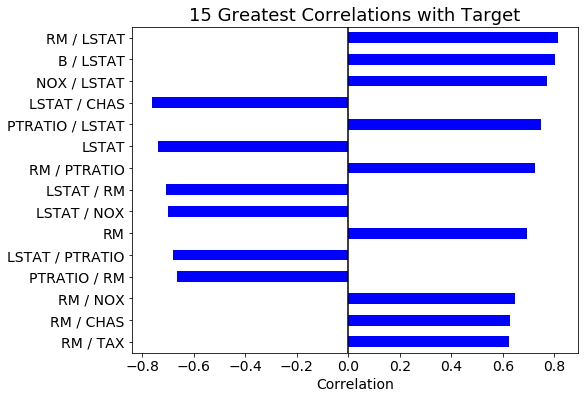

In [10]:
n = 15

plt.rcParams['font.size'] = 14
corr_df.iloc[:n, :].plot.barh(y = 'corr', x = 'feature', color = 'b', legend = None, figsize = (8, 6))
plt.axvline(0, color = 'k'); plt.xlabel('Correlation'); plt.ylabel(''); 
# Reverse y axis
plt.gca().invert_yaxis()
plt.title(f"{n} Greatest Correlations with Target", size = 18)

In [11]:
def plot_correlations(feature_matrix, labels, n = 10, return_corr = False):
    """Plots the `n` most correlated features with the label
    
    Args:
        feature_matrix (dataframe): dataframe with features in the columns for plotting
        labels (array-like): targets (binary or continuous) to calculate the correlations against
        n (int): number of most correlated features to plot. Default is 10
        return_corr (boolean): return the correlations or not. Default is False
    
    Return:
        corr_df (dataframe): Optional dataframe returned if `return_corr` is True. Columns are `feature` and `corr` 
                             indicating the correlation with the label
    """
    
    corr_df = pd.DataFrame(columns = ['feature', 'corr'])

    for col in feature_matrix:
        try: 
            correlation = feature_matrix[col].corr(pd.Series(y))
            corr_df = corr_df.append(pd.DataFrame({'feature': col, 'corr': correlation}, index = [0]),
                           ignore_index = True)
        except:
            pass
        
    # Sort values by the absolute value of the correlation
    corr_df = corr_df.reindex(corr_df['corr'].abs().sort_values(ascending = False).index)

    plt.rcParams['font.size'] = 14
    corr_df.iloc[:n, :].plot.barh(y = 'corr', x = 'feature', 
                                  color = 'b', legend = None, 
                                  figsize = (8, 6))
    
    # Add vertical line at 0
    plt.axvline(0, color = 'k'); plt.xlabel('Correlation'); plt.ylabel(''); 
    
    # Reverse y axis
    plt.gca().invert_yaxis()
    plt.title(f"{n} Greatest Correlations with Target", size = 18)
    
    if return_corr:
        return corr_df

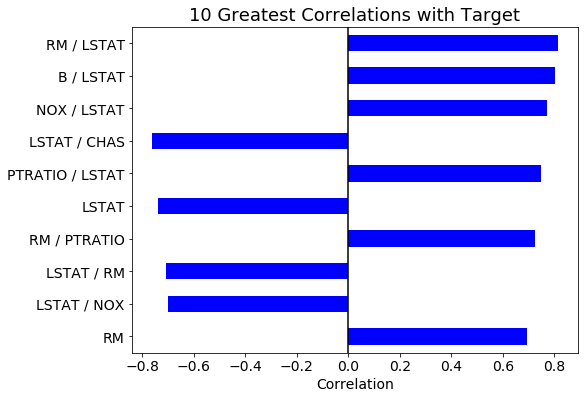

In [12]:
plot_correlations(feature_matrix, y)

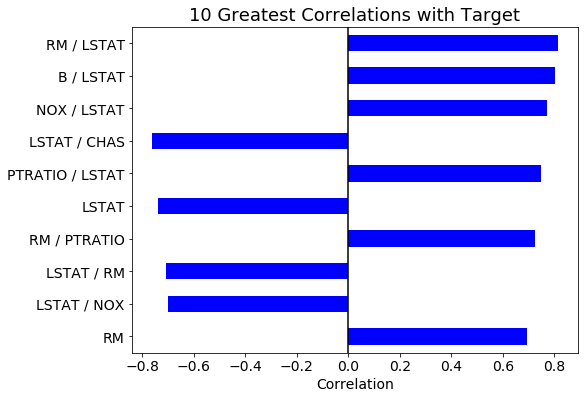

In [13]:
corr_df = plot_correlations(feature_matrix, y, return_corr=True)